Running simulation with 30 agents...
1
2
3


c:\Users\Peter\OneDrive - University of Edinburgh\Desktop\PHD\github\DEM_test\Ageng_based_simulation\Force_based_model\main.py:101: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b,angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]
c:\Users\Peter\OneDrive - University of Edinburgh\Desktop\PHD\github\DEM_test\Ageng_based_simulation\Force_based_model\main.py:131: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  new_agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b, angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

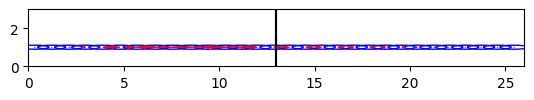

{'t_in': -1, 't_out': -1, 'x_in': 0, 'x_out': 26}
[(30, np.float64(inf), np.float64(nan))]
Results saved to simulation_results_evenly_spaced.csv


c:\Users\Peter\OneDrive - University of Edinburgh\Desktop\PHD\github\DEM_test\Ageng_based_simulation\Force_based_model\measurement.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  v = np.sqrt((x_out - x_in) ** 2) / ((t_out - t_in) * 0.01)
c:\Users\Peter\OneDrive - University of Edinburgh\Desktop\PHD\github\DEM_test\Ageng_based_simulation\Force_based_model\measurement.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return sum / ((t_out - t_in) * 0.01)


In [1]:
from environment import Environment
from agent import Agent
from main import GCFModel
import measurement
import csv
import random


# Function to create agents evenly spaced across the field, avoiding overlap with the test agent
def create_agents(num_agents, canvas_width=26.0):
    agents = []

    # Calculate spacing between agents
    space_between_agents = (canvas_width - 1) / (num_agents)

    current_x_position = 0.5
    for i in range(num_agents):
        # Create agents with the same properties except the test agent for the first position
        if i == 0:
            agents.append(Agent(position=[current_x_position, 1], velocity=[0.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, 
                                f=1.25, desired_walking_speed=1.34, test=True))
        else:
            agents.append(Agent(position=[current_x_position, 1], velocity=[0.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, 
                                f=1.25, desired_walking_speed=1.34, test=False))
        
        current_x_position += space_between_agents

    return agents



# Function to run a single simulation and log the test agent's velocity and density
def run_single_simulation(num_agents, steps=5000, dt=0.01, log_interval=1000):
    env = Environment(width=26, height=3, bottleneck_width=0, bottleneck_height=0, periodic=True)
    agents = create_agents(num_agents)
    
    gcf_model = GCFModel(environment=env, agents=agents, time_constant=1.5, eta=0.2)
    # gcf_model.run_simulation(steps=steps, dt=dt, log_interval=log_interval)
    gcf_model.animate(1000, dt=0.01, interval=100, output_filename="crowd_simulation_test.gif", show_forces=True)
    
    print(agents[0].memory)
    # print(env.ins_density)
    # print(len(env.ins_density))
    # Calculate average velocity and density for the test agent
    v = measurement.find_average_velocity(agents[0])
    density = measurement.find_averaged_density(env.ins_density, agents[0], 0.01)
    
    return v, density

# Main function to run multiple simulations with varying number of agents
def run_multiple_simulations(agent_counts, steps=25001, dt=0.01, log_interval=5000):
    results = []
    
    for num_agents in agent_counts:
        print(f"Running simulation with {num_agents} agents...")
        v, density = run_single_simulation(num_agents, steps, dt, log_interval)
        results.append((num_agents, v, density))
        # print(num_agents, v, density)
    
    return results


# Function to write the simulation results to a CSV file
def write_results_to_csv(filename, results):
    # Write header and results to CSV
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Number of Agents", "Test Agent Velocity", "Test Agent Density"])
        writer.writerows(results)

# Define the number of agents to test (start with 10 agents and increase)
agent_counts = list(range(55, 145, 5))
agent_counts = [30]

# Run the simulations
results = run_multiple_simulations(agent_counts)
print(results)

# Save the results to a CSV file
csv_filename = "simulation_results_evenly_spaced.csv"
write_results_to_csv(csv_filename, results)

print(f"Results saved to {csv_filename}")


In [5]:
import numpy as np
import misc
# Assuming your Agent class is already defined elsewhere and works as expected

# Create two agents with example parameters
agent1 = Agent(position=[0, 0], velocity=[1.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, 
               f=1.25, desired_walking_speed=1.34, test=True)

agent2 = Agent(position=[1, 0], velocity=[1.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, 
               f=1.25, desired_walking_speed=1.34, test=True)

# Define the normalize function (from the previous algorithm)
def normalize(vector):
    return vector / np.linalg.norm(vector)

# Assuming calculate_closest_distance function is already defined
# We now use it to check the closest distance between the two agents
distance = misc.calculate_closest_distance(agent1, agent2)

# Output the calculated closest distance
print(f"The closest distance between agent1 and agent2 is: {distance:.4f}")
print(f'agent1a{agent1.a}')
print(f'agent2a{agent2.a}')

# Also, you may want to print agent attributes to verify correct initialization
print(f"Agent 1: Position = {agent1.position}, Velocity = {agent1.velocity}")
print(f"Agent 2: Position = {agent2.position}, Velocity = {agent2.velocity}")


The closest distance between agent1 and agent2 is: 6.6028
agent1a0.71
agent2a0.71
Agent 1: Position = [0 0], Velocity = [1. 0.]
Agent 2: Position = [1 0], Velocity = [1. 0.]
